<a href="https://colab.research.google.com/github/patricklai14/cs7643_project/blob/main/arXiv_multilabel_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ArXiv multi-lable classification

### Setup
As this is a kaggle dataset, you will need a "kaggle.json" file (containing your kaggle username and token key).

The code below will automatically fetch the data if you don't already have it in your GDrive. You will be prompted to upload the "kaggle.json" file if you've never ran this code before.

This whole process will take about 60 seconds.

In [ ]:
!pip install tqdm
!pip install simpletransformers

# mount your GDrive file system to this colab notebook instance
from google.colab import drive
drive.mount('/content/gdrive/')

#
# set up environment
import os
from google.colab import files

if not os.path.exists('/content/gdrive/My Drive/Kaggle'):
    os.makedirs('/content/gdrive/My Drive/Kaggle')

os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
%cd /content/gdrive/My Drive/Kaggle

#
# get the dataset if not already present
if not os.path.exists('/content/gdrive/My Drive/Kaggle/arxiv-metadata-oai-snapshot.json'):
  if not os.path.exists('/content/gdrive/My Drive/Kaggle/kaggle.json'):
    print('kaggle.json not found! Please upload...')
    files.upload()

  # install kaggle package, then download and automatically unzip the dataset
  !pip install kaggle
  !kaggle datasets download -d Cornell-University/arxiv --unzip

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
/content/gdrive/My Drive/Kaggle


In [ ]:
#@title
# Parsed and modified from Section 5.3. Subject Classifications: 
#
# https://arxiv.org/help/api/user-manual

subject_classifications = {
# custom added by M.R. (missing in arXiv given list)
'econ.TH': 'Economics Theory',
'econ.GN': 'Economics General',
'eess.SY': 'Electrical Engineering Systems',
'acc-phys': 'Accelerator Physics',
'adap-org': 'Adaptation and Self-Organizing Systems',
'q-bio': 'Other Quantitative Biology',
'cond-mat': 'Other Condensed Matter',
'chao-dyn': 'Chaotic Dynamics',
'patt-sol': 'Pattern Formation and Solitons',
'dg-ga': 'dg-ga',  # ambiguous
'bayes-an': 'Bayesian Analysis',
'solv-int': 'Exactly Solvable and Integrable Systems',
'comp-gas': 'Computational Lattice Gases', 
'alg-geom': 'Algebraic Geometry',
'funct-an': 'Functional Analysis',
'q-alg': 'Quantum Algebra', # see "math.QA"
'ao-sci': 'Atmospheric and Oceanic Physics', # see "physics.ao-ph" 
'atom-ph': 'Atomic Physics',
'chem-ph': 'Chemical Phyics',
'plasm-ph': 'Plasma Physics',
'mtrl-th': 'Materials Science', # see "cond-mat.mtrl-sci"
'cmp-lg': 'Computational Linguistics',
'supr-con': 'Superconductivity', # see "cond-mat.supr-con"


# default provided by arXiv
'astro-ph': 'Astrophysics',
'astro-ph.CO': 'Cosmology and Nongalactic Astrophysics',
'astro-ph.EP': 'Earth and Planetary Astrophysics',
'astro-ph.GA': 'Astrophysics of Galaxies',
'astro-ph.HE': 'High Energy Astrophysical Phenomena',
'astro-ph.IM': 'Instrumentation and Methods for Astrophysics',
'astro-ph.SR': 'Solar and Stellar Astrophysics',
'cond-mat.dis-nn': 'Disordered Systems and Neural Networks',
'cond-mat.mes-hall': 'Mesoscale and Nanoscale Physics',
'cond-mat.mtrl-sci': 'Materials Science',
'cond-mat.other': 'Other Condensed Matter',
'cond-mat.quant-gas': 'Quantum Gases',
'cond-mat.soft': 'Soft Condensed Matter',
'cond-mat.stat-mech': 'Statistical Mechanics',
'cond-mat.str-el': 'Strongly Correlated Electrons',
'cond-mat.supr-con': 'Superconductivity',
'cs.AI': 'Artificial Intelligence',
'cs.AR': 'Hardware Architecture',
'cs.CC': 'Computational Complexity',
'cs.CE': 'Computational Engineering, Finance, and Science',
'cs.CG': 'Computational Geometry',
'cs.CL': 'Computation and Language',
'cs.CR': 'Cryptography and Security',
'cs.CV': 'Computer Vision and Pattern Recognition',
'cs.CY': 'Computers and Society',
'cs.DB': 'Databases',
'cs.DC': 'Distributed, Parallel, and Cluster Computing',
'cs.DL': 'Digital Libraries',
'cs.DM': 'Discrete Mathematics',
'cs.DS': 'Data Structures and Algorithms',
'cs.ET': 'Emerging Technologies',
'cs.FL': 'Formal Languages and Automata Theory',
'cs.GL': 'General Literature',
'cs.GR': 'Graphics',
'cs.GT': 'Computer Science and Game Theory',
'cs.HC': 'Human-Computer Interaction',
'cs.IR': 'Information Retrieval',
'cs.IT': 'Information Theory',
'cs.LG': 'Machine Learning',
'cs.LO': 'Logic in Computer Science',
'cs.MA': 'Multiagent Systems',
'cs.MM': 'Multimedia',
'cs.MS': 'Mathematical Software',
'cs.NA': 'Numerical Analysis',
'cs.NE': 'Neural and Evolutionary Computing',
'cs.NI': 'Networking and Internet Architecture',
'cs.OH': 'Other Computer Science',
'cs.OS': 'Operating Systems',
'cs.PF': 'Performance',
'cs.PL': 'Programming Languages',
'cs.RO': 'Robotics',
'cs.SC': 'Symbolic Computation',
'cs.SD': 'Sound',
'cs.SE': 'Software Engineering',
'cs.SI': 'Social and Information Networks',
'cs.SY': 'Systems and Control',
'econ.EM': 'Econometrics',
'eess.AS': 'Audio and Speech Processing',
'eess.IV': 'Image and Video Processing',
'eess.SP': 'Signal Processing',
'gr-qc': 'General Relativity and Quantum Cosmology',
'hep-ex': 'High Energy Physics - Experiment',
'hep-lat': 'High Energy Physics - Lattice',
'hep-ph': 'High Energy Physics - Phenomenology',
'hep-th': 'High Energy Physics - Theory',
'math.AC': 'Commutative Algebra',
'math.AG': 'Algebraic Geometry',
'math.AP': 'Analysis of PDEs',
'math.AT': 'Algebraic Topology',
'math.CA': 'Classical Analysis and ODEs',
'math.CO': 'Combinatorics',
'math.CT': 'Category Theory',
'math.CV': 'Complex Variables',
'math.DG': 'Differential Geometry',
'math.DS': 'Dynamical Systems',
'math.FA': 'Functional Analysis',
'math.GM': 'General Mathematics',
'math.GN': 'General Topology',
'math.GR': 'Group Theory',
'math.GT': 'Geometric Topology',
'math.HO': 'History and Overview',
'math.IT': 'Information Theory',
'math.KT': 'K-Theory and Homology',
'math.LO': 'Logic',
'math.MG': 'Metric Geometry',
'math.MP': 'Mathematical Physics',
'math.NA': 'Numerical Analysis',
'math.NT': 'Number Theory',
'math.OA': 'Operator Algebras',
'math.OC': 'Optimization and Control',
'math.PR': 'Probability',
'math.QA': 'Quantum Algebra',
'math.RA': 'Rings and Algebras',
'math.RT': 'Representation Theory',
'math.SG': 'Symplectic Geometry',
'math.SP': 'Spectral Theory',
'math.ST': 'Statistics Theory',
'math-ph': 'Mathematical Physics',
'nlin.AO': 'Adaptation and Self-Organizing Systems',
'nlin.CD': 'Chaotic Dynamics',
'nlin.CG': 'Cellular Automata and Lattice Gases',
'nlin.PS': 'Pattern Formation and Solitons',
'nlin.SI': 'Exactly Solvable and Integrable Systems',
'nucl-ex': 'Nuclear Experiment',
'nucl-th': 'Nuclear Theory',
'physics.acc-ph': 'Accelerator Physics',
'physics.ao-ph': 'Atmospheric and Oceanic Physics',
'physics.app-ph': 'Applied Physics',
'physics.atm-clus': 'Atomic and Molecular Clusters',
'physics.atom-ph': 'Atomic Physics',
'physics.bio-ph': 'Biological Physics',
'physics.chem-ph': 'Chemical Physics',
'physics.class-ph': 'Classical Physics',
'physics.comp-ph': 'Computational Physics',
'physics.data-an': 'Data Analysis, Statistics and Probability',
'physics.ed-ph': 'Physics Education',
'physics.flu-dyn': 'Fluid Dynamics',
'physics.gen-ph': 'General Physics',
'physics.geo-ph': 'Geophysics',
'physics.hist-ph': 'History and Philosophy of Physics',
'physics.ins-det': 'Instrumentation and Detectors',
'physics.med-ph': 'Medical Physics',
'physics.optics': 'Optics',
'physics.plasm-ph': 'Plasma Physics',
'physics.pop-ph': 'Popular Physics',
'physics.soc-ph': 'Physics and Society',
'physics.space-ph': 'Space Physics',
'q-bio.BM': 'Biomolecules',
'q-bio.CB': 'Cell Behavior',
'q-bio.GN': 'Genomics',
'q-bio.MN': 'Molecular Networks',
'q-bio.NC': 'Neurons and Cognition',
'q-bio.OT': 'Other Quantitative Biology',
'q-bio.PE': 'Populations and Evolution',
'q-bio.QM': 'Quantitative Methods',
'q-bio.SC': 'Subcellular Processes',
'q-bio.TO': 'Tissues and Organs',
'q-fin.CP': 'Computational Finance',
'q-fin.EC': 'Economics',
'q-fin.GN': 'General Finance',
'q-fin.MF': 'Mathematical Finance',
'q-fin.PM': 'Portfolio Management',
'q-fin.PR': 'Pricing of Securities',
'q-fin.RM': 'Risk Management',
'q-fin.ST': 'Statistical Finance',
'q-fin.TR': 'Trading and Market Microstructure',
'quant-ph': 'Quantum Physics',
'stat.AP': 'Applications',
'stat.CO': 'Computation',
'stat.ME': 'Methodology',
'stat.ML': 'Machine Learning',
'stat.OT': 'Other Statistics',
'stat.TH': 'Statistics Theory'
}

### Dataset Import


In [ ]:
from tqdm.notebook import tqdm

import pandas as pd
import json

texts, labels = list(), list()

# -- Define a dataset generator to conserve limited RAM --
# using pd.read_json (even w/ lines=True and low chunksize) results in 
# exceeding available RAM. This is because a full df representation of the 
# dataset alone is too large. We need to go line by line and select just the 
# text and label fields for our dataframe.
def _paper_generator():
  with open('arxiv-metadata-oai-snapshot.json', 'r') as _file:
    for _line in _file:
      yield _line
paper_generator = _paper_generator()


label_universe = [*subject_classifications]

counter = 0
for paper_string in tqdm(paper_generator):
  paper_dict = json.loads(paper_string)
  counter += 1  # just for data accounting purposes at the end (sanity check)

  title = paper_dict['title']

  # add the X, y from this paper
  texts.append(title + '. ' + paper_dict['abstract'].replace("\n","").strip())
  labels.append(tuple(paper_dict['categories'].split()))

#
# construct the dataframe
arxiv_df = pd.DataFrame({
    'text': texts,
    'labels': labels
})

print('counter: {}'.format(counter))
print(arxiv_df.head())
print('{} papers populated into dataframe'.format(len(arxiv_df)))

0it [00:00, ?it/s]

counter: 1869200
                                                text              labels
0  Calculation of prompt diphoton production cros...           (hep-ph,)
1  Sparsity-certifying Graph Decompositions. We d...    (math.CO, cs.CG)
2  The evolution of the Earth-Moon system based o...   (physics.gen-ph,)
3  A determinant of Stirling cycle numbers counts...          (math.CO,)
4  From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...  (math.CA, math.FA)
1869200 papers populated into dataframe


### Class imbalance issues

This code block is very inefficient. I takes about 2 min. 55 sec.

0it [00:00, ?it/s]

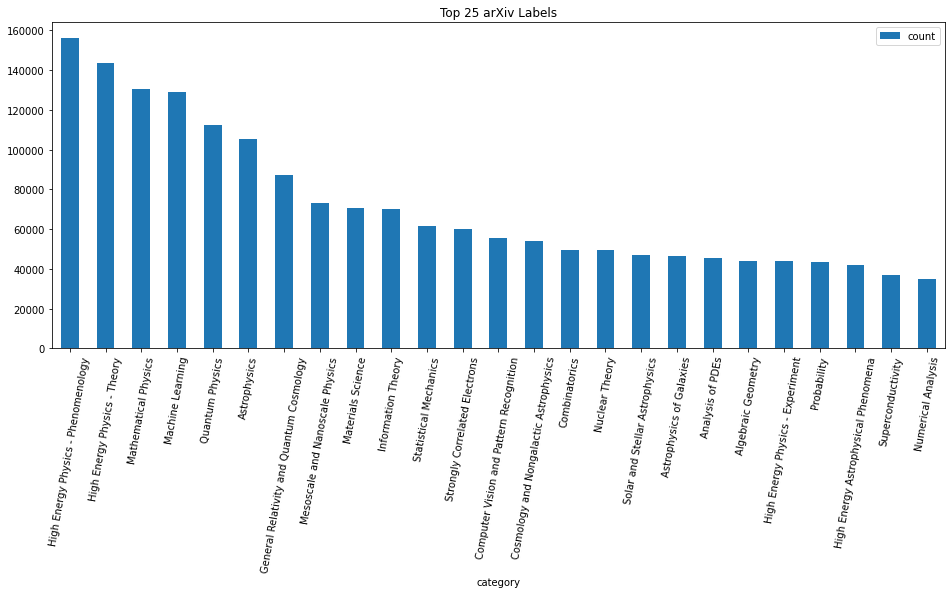

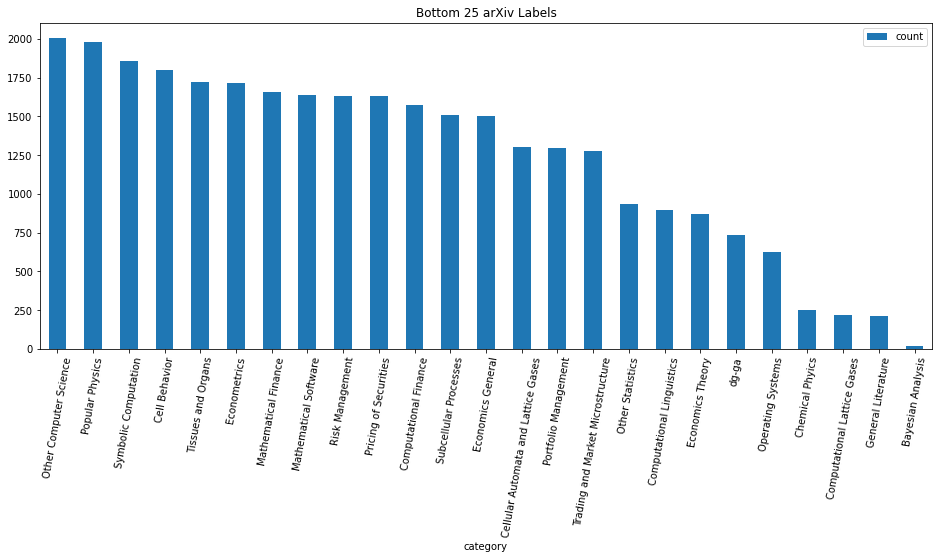

In [ ]:
from operator import itemgetter

def get_histogram(df):
  counts = dict()

  # generate count data
  for index, row in tqdm(df.iterrows()):
    for label in list(row['labels']):
      if subject_classifications[label] not in counts.keys():
        counts[subject_classifications[label]] = 0
      
      counts[subject_classifications[label]] += 1

  # make the plot
  #
  # sort categories by frequency (converting to tuple list)
  sorted_categories = [(key, value) for key, value in counts.items()]
  sorted_categories.sort(key=itemgetter(1), reverse=True)
   
  #
  # make histogram (for top 25)
  df = pd.DataFrame(sorted_categories[0:25], columns=['category', 'count'])
  df.plot(title='Top 25 arXiv Labels', kind='bar', x='category', figsize=(16,6), rot=80)

  #
  # make histogram (for bottom 25)
  df = pd.DataFrame(sorted_categories[-25:], columns=['category', 'count'])
  df.plot(title='Bottom 25 arXiv Labels', kind='bar', x='category', figsize=(16,6), rot=80)

#
#
# plot the category distribution as it is given in the dataset
get_histogram(arxiv_df)

### Imperfect fix (but good enough)

Since this is multilabel problem, it's difficult to ensure each category is sampled equally without reducing some samples from multi-lable to single label.

0it [00:00, ?it/s]

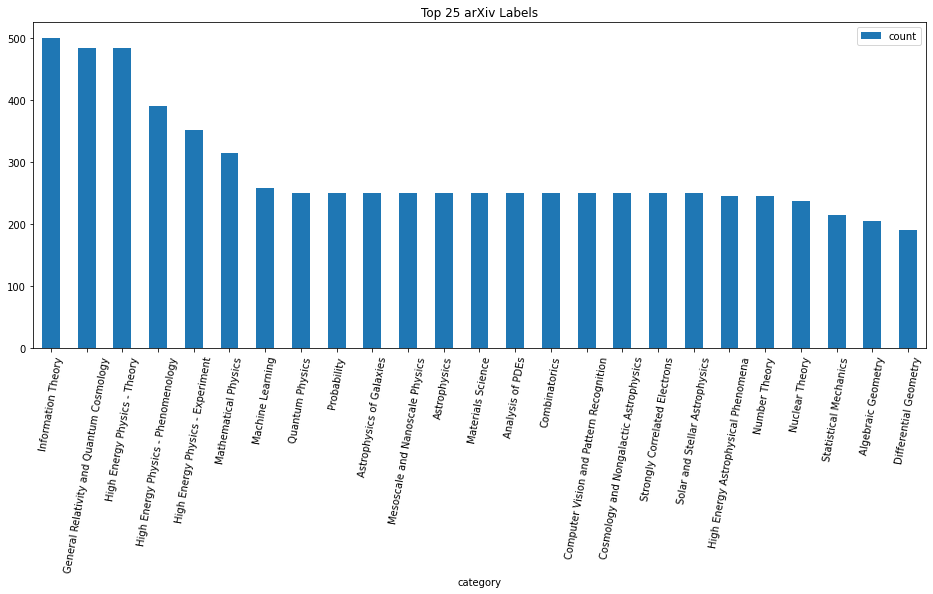

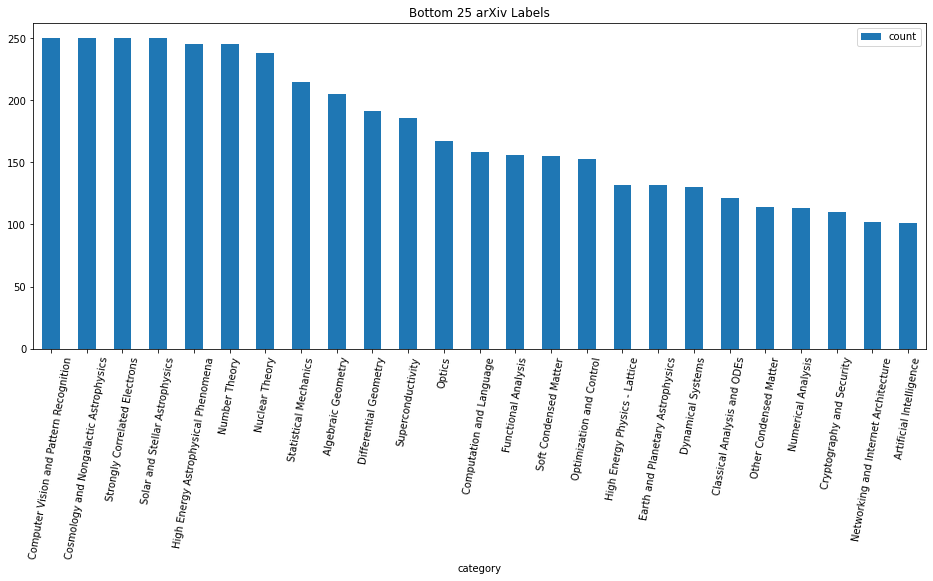

In [ ]:
MIN_COUNT = 100
SAMPLING = 250
MAX_EXAMPLES = 1000 * 25

arxiv_df = arxiv_df.sample(frac=1).reset_index(drop=True)
arxiv_df = arxiv_df.head(MAX_EXAMPLES)

well_sampled_multilabels = arxiv_df['labels'].value_counts().reset_index(name='tuple_counts').query('tuple_counts > {}'.format(MIN_COUNT))['index'].tolist()
arxiv_df = arxiv_df[arxiv_df['labels'].isin(well_sampled_multilabels)].reset_index(drop=True)
#arxiv_df = arxiv_df.sample(frac=1).reset_index(drop=True)
arxiv_df = arxiv_df.groupby('labels').head(SAMPLING).reset_index(drop=True)

get_histogram(arxiv_df)

## Model setup and data encoding

In [ ]:
from simpletransformers.classification import MultiLabelClassificationModel

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

import torch

cuda_available = torch.cuda.is_available()

#
#
# encode the data
multi_label_encoder = MultiLabelBinarizer()
multi_label_encoder.fit(arxiv_df['labels'])
arxiv_df['label_encodings'] = arxiv_df['labels'].apply(lambda x: multi_label_encoder.transform([x])[0])

arxiv_df = arxiv_df[['text', 'labels', 'label_encodings']]

#
#
# create the model
model_args = {
    "reprocess_input_data": True,
    "overwrite_output_dir": True,
    "save_model_every_epoch": False, 
    "save_eval_checkpoints": False,
    "max_seq_length": 512,
    "train_batch_size": 16,
    "num_train_epochs": 10,
}

model = MultiLabelClassificationModel('roberta', 
                                      'roberta-base', 
                                      num_labels=len(arxiv_df['label_encodings'][0]),
                                      use_cuda=cuda_available, 
                                      args=model_args)
#
#
# split the data
train_df, evaluation_df = train_test_split(arxiv_df, test_size=0.1, stratify=arxiv_df['labels'], random_state=42)

arxiv_df.head()

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultiLabelSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultiLabelSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'clas

,text,labels,label_encodings
0,Revisiting Bohr's principle of complementarity...,"(quant-ph,)","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Fragmentations with self-similar branching spe...,"(math.PR,)","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"Charmonium singlets, open charm and exotic had...","(hep-ph,)","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Optimal filtering of the LISA data. The LISA t...,"(gr-qc,)","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,Detection of New Methylamine (CH$_3$NH$_2$) So...,"(astro-ph.GA,)","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
#
#
# train & evaluate the model
model.train_model(train_df[['text', 'label_encodings']])

result, model_outputs, incorrect_predictions = model.eval_model(evaluation_df[['text', 'label_encodings']])
print(result)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:449: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/7416 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/464 [00:00<?, ?it/s]

Running Epoch 1 of 10:   0%|          | 0/464 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/464 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/464 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/464 [00:00<?, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/464 [00:00<?, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/464 [00:00<?, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/464 [00:00<?, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/464 [00:00<?, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/464 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1029: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/824 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/103 [00:00<?, ?it/s]

{'LRAP': 0.8081831935594078, 'eval_loss': 0.04347075617790801}


### Performance metric visualizations

In [1]:
import matplotlib.pyplot as plt
import numpy as np

predicted_categories_encoded = list(map(lambda x: np.argmax(x), model_outputs))
eval_gt_labels = evaluation_df['label_encodings'].apply(lambda x: np.argmax(x)).tolist()

plt.figure(figsize=(20,16))
cf_matrix = confusion_matrix(predicted_categories_encoded, eval_gt_labels)
ax = sns.heatmap(cf_matrix / np.sum(cf_matrix))
ax.set_xlabel('Predicted labels', fontsize=16)
ax.set_ylabel('True labels', fontsize=16)
ax.set_title('Confusion Matrix', fontsize=20)

plt.show()

NameError: ignored

In [ ]:
import random

for i in range(25):
    random_idx = random.randint(0, len(evaluation_df)-1)
    text = evaluation_df.iloc[random_idx]['text']
    true_categories = evaluation_df.iloc[random_idx]['labels']

    predicted_categories_encoded, raw_outputs = model.predict([text])
    predicted_categories_encoded = np.array(predicted_categories_encoded)
    predicted_categories_encoded[0][np.argmax(raw_outputs[0])] = 1
    predicted_categories = multi_label_encoder.inverse_transform(predicted_categories_encoded)[0]

    print(f'True Labels:'.ljust(21,' '), f'{true_categories} - {subject_classifications[true_categories[0]]}\n')
    print(f'Predicted Labels: {predicted_categories} - {subject_classifications[predicted_categories[0]]}\n')
    print(f'Text: {text}\n\n')